## K-Means

### Disciplina Inteligência Artificial

Neste jupyter vamos fazer treinamento não-supervisionado com K-Means, utilizando um conjunto de dados fictício e o dataset Iris

In [ ]:
# Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure
%matplotlib inline

## Criando um dataset fictício

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


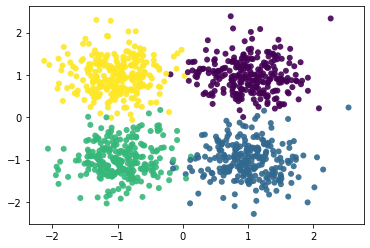

In [ ]:
# Vamos gerar alguns dados aleatórios e plotar
from sklearn.datasets.samples_generator import make_blobs
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.4, random_state = 100)
plt.scatter(X[:,0], X[:,1], c = y, edgecolors = 'none', alpha = 0.9)
plt.show()

## Utilizando o K-Means

In [ ]:
# Vamos agora criar o modelo e treinar com os dados de entrada, sendo que esperamos 4 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, max_iter = 1, n_init = 1, init = 'random', random_state = 101)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1, n_clusters=4,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=101,
       tol=0.0001, verbose=0)

In [ ]:
# Definindo uma função para plotar os clusters encontrados
def plot_clusters(km, xx, yy, xy):
    plt.imshow(xy, interpolation = 'nearest', cmap=plt.cm.Accent, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               aspect = 'auto', origin = 'lower')
    plt.scatter(X[:,0], X[:,1], c = km.labels_, edgecolors = 'none', alpha = 0.7)
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)

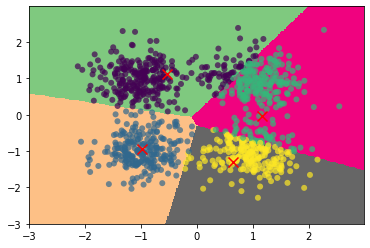

In [ ]:
# Prevendo os dados com o modelo treinado e plotando o driagrama de voronoi
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
xy_pred = km.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plot_clusters(km, xx, yy, xy_pred)

Veja que rodando com uma iteração o K-Means não obteve bom resultado. 

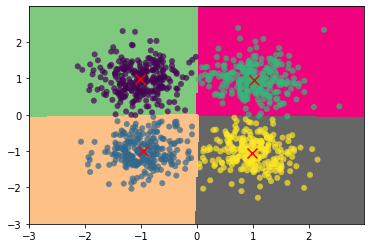

In [ ]:
# Vamos amentar para 5 e ver o que ocorre
km = KMeans(n_clusters = 4, max_iter = 5, n_init = 1, init = 'random', random_state = 101)
km.fit(X)
xy_pred = km.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plot_clusters(km, xx, yy, xy_pred)

Veja que melhorou bastante

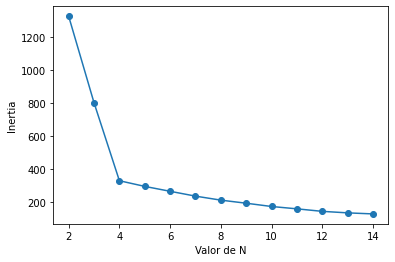

In [ ]:
# Vamos agora rodar com vários outros valores e plotar o valor da Inertia
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo. Quando menor a inértia, melhor
n_clusters = range(2, 15)
inertias = []
for N in n_clusters:
    km = KMeans(n_clusters = N, random_state = 101)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_clusters, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Ou seja, a partir de 4 custers, a inértia reduz consideravelmente

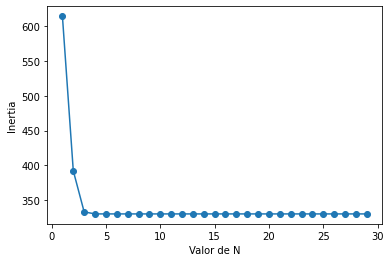

In [ ]:
# Vamos verificar a influência do número de iterações na Inertia
n_iters = range(1, 30)
inertias = []
for N in n_iters:
    km = KMeans(n_clusters = 4, max_iter = N, n_init = 1, init = 'random', random_state = 101)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_iters, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Veja que o número de iterações não influencia muito. O número 5 é suficiente.

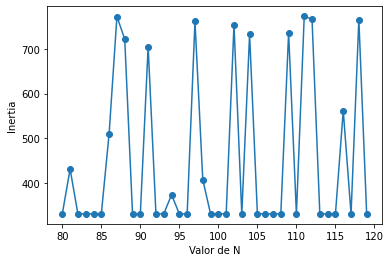

In [ ]:
# Vamos verificar a influência do random state na Inertia
n_random_state = range(80, 120)
inertias = []
for N in n_random_state:
    km = KMeans(n_clusters = 4, max_iter = 5, n_init = 1, init = 'random', random_state = N)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_random_state, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Veja que o resultado pode variar muito de acordo com o valor escolhido

## Utilizando o Dataset Iris

In [ ]:
# Vamos carregar o dataset IRIS
from sklearn.datasets import load_iris

In [ ]:
# Vamos agora utilizar o mecanismo PCA para reduzir a dimensionalidade das 4 variáveis do IRIS para apenas 2 e poder plotar
from sklearn.decomposition import PCA

iris = load_iris()
pca = PCA(n_components = 2).fit(iris.data)
pca_2d = pca.transform(iris.data)
pca_2d.shape

(150, 2)

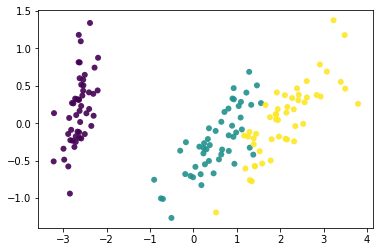

In [ ]:
# Vamos plotar os dados de IRIS em 2 dimensões
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = iris.target, edgecolors = 'none', alpha = 0.9)
plt.show()

In [ ]:
# Criando o modelo com 3 clusters
km = KMeans(n_clusters = 3, random_state = 111)
km.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

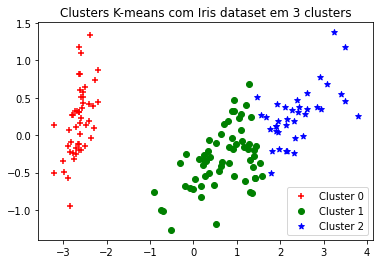

In [ ]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif km.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif km.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        plt.legend([c1, c2, c3],['Cluster 0', 'Cluster 1', 'Cluster 2'])
        plt.title('Clusters K-means com Iris dataset em 3 clusters')
plt.show()

# Exercício K-Means 01 (Aula05_Parte3)

Rodar com vários outros valores e plotar o valor da Inertia para o dataset Iris. Qual o melhor valor de n_clusters?

Faça testes também com o número de iterações e random state.

Qual a melhor configuração para o dataset Iris e quais os resultados obtidos?

## ------------ Teste 1 ------------

In [ ]:
# Vamos agora utilizar o mecanismo PCA para reduzir a dimensionalidade das 4 variáveis do IRIS para apenas 2 e poder plotar
iris = load_iris()
#print(iris.data.shape)
pca = PCA(n_components = 2).fit(iris.data)
pca_2d = pca.transform(iris.data)
pca_2d.shape

(150, 2)

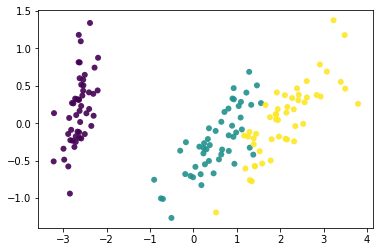

In [ ]:
# Vamos plotar os dados de IRIS em 2 dimensões
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = iris.target, edgecolors = 'none', alpha = 0.9)
plt.show()

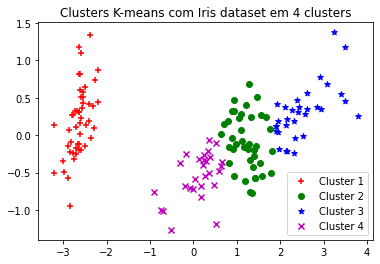

In [ ]:
# Criando o modelo com 4 clusters
km = KMeans(n_clusters = 4, random_state = 111)
km.fit(iris.data)

# Gerando "labels" para os resultados dos clusters
for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif km.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif km.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif km.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='x')
        plt.legend([c1, c2, c3, c4],['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])
        plt.title('Clusters K-means com Iris dataset em 4 clusters')
plt.show()

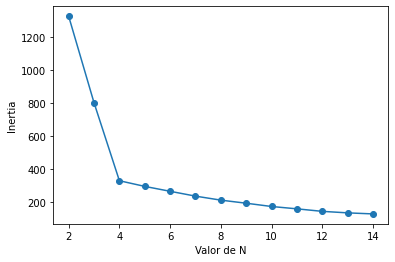

In [ ]:
# Vamos agora rodar com vários outros valores e plotar o valor da Inertia
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo. Quando menor a inértia, melhor
n_clusters = range(2, 15)
inertias = []
for N in n_clusters:
    km = KMeans(n_clusters = N, random_state = 101)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_clusters, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Ou seja, a partir de 4 custers, a inértia reduz consideravelmente

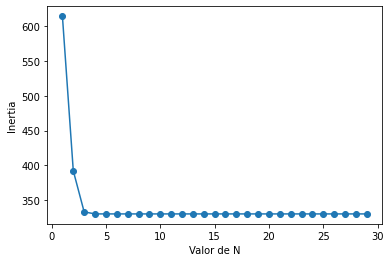

In [ ]:
# Vamos verificar a influência do número de iterações na Inertia
n_iters = range(1, 30)
inertias = []
for N in n_iters:
    km = KMeans(n_clusters = 4, max_iter = N, n_init = 1, init = 'random', random_state = 101)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_iters, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Veja que o número de iterações não influencia muito. O número 5 é suficiente.

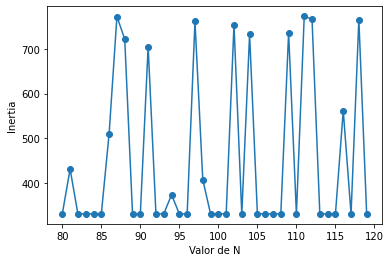

In [ ]:
# Vamos verificar a influência do random state na Inertia
n_random_state = range(80, 120)
inertias = []
for N in n_random_state:
    km = KMeans(n_clusters = 4, max_iter = 5, n_init = 1, init = 'random', random_state = N)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_random_state, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Veja que o resultado pode variar muito de acordo com o valor escolhido

## ------------- teste 2 ---------------------

In [ ]:
# Vamos agora utilizar o mecanismo PCA para reduzir a dimensionalidade das 4 variáveis do IRIS para apenas 2 e poder plotar
iris = load_iris()
pca = PCA(n_components = 2).fit(iris.data)
pca_2d = pca.transform(iris.data)
pca_2d.shape

(150, 2)

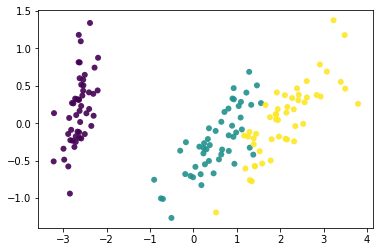

In [ ]:
# Vamos plotar os dados de IRIS em 2 dimensões
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = iris.target, edgecolors = 'none', alpha = 0.9)
plt.show()

In [ ]:
# Criando o modelo com 5 clusters
km = KMeans(n_clusters = 5, random_state = 111)
km.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

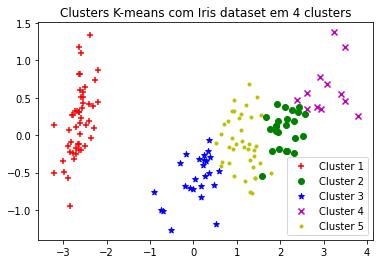

In [ ]:
# Gerando "labels" para os resultados dos clusters

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif km.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif km.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif km.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='x')
    elif km.labels_[i] == 4:
        c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='.')       
        plt.legend([c1, c2, c3, c4,c5],['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5'])
        plt.title('Clusters K-means com Iris dataset em 4 clusters')
plt.show()

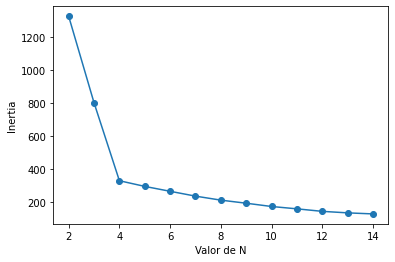

In [ ]:
# Vamos agora rodar com vários outros valores e plotar o valor da Inertia
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo. Quando menor a inértia, melhor
n_clusters = range(2, 15)
inertias = []
for N in n_clusters:
    km = KMeans(n_clusters = N, random_state = 101)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_clusters, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Ou seja, a partir de 4 custers, a inértia reduz consideravelmente

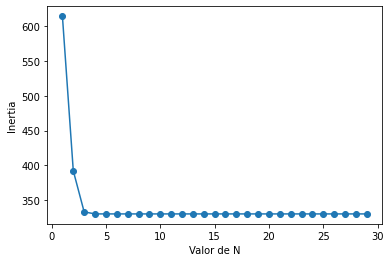

In [ ]:
# Vamos verificar a influência do número de iterações na Inertia
n_iters = range(1, 30)
inertias = []
for N in n_iters:
    km = KMeans(n_clusters = 4, max_iter = N, n_init = 1, init = 'random', random_state = 101)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_iters, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Veja que o número de iterações não influencia muito. O número 5 é suficiente.

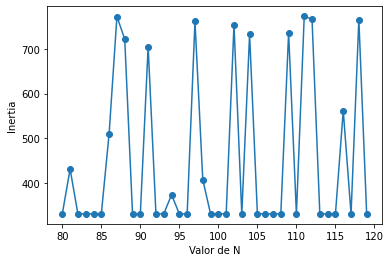

In [ ]:
# Vamos verificar a influência do random state na Inertia
n_random_state = range(80, 120)
inertias = []
for N in n_random_state:
    km = KMeans(n_clusters = 4, max_iter = 5, n_init = 1, init = 'random', random_state = N)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(n_random_state, inertias, 'o-')
plt.xlabel("Valor de N")
plt.ylabel("Inertia")
plt.show()

Veja que o resultado pode variar muito de acordo com o valor escolhido

Hiper-parâmentro | Acuracia
---|---
n_clusters = 3|
n_clusters = 4 |
n_clusters = 5|


FIM